# 지도 학습
---
## 3. 지도 학습 알고리즘
==================================================
### 3.1 예제에 사용할 데이터셋

In [2]:
# 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


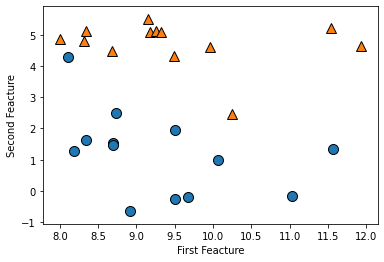

x.shape: (26, 2)


In [3]:
# forge 데이터 셋
# 인위적으로 만든 이진분류 데이터셋
x, y = mglearn.datasets.make_forge()

# 산점도
mglearn.discrete_scatter(x[:,0], x[:, 1], y)
plt.legend
plt.xlabel("First Feacture")
plt.ylabel("Second Feacture")
plt.show()

print("x.shape:", x.shape)

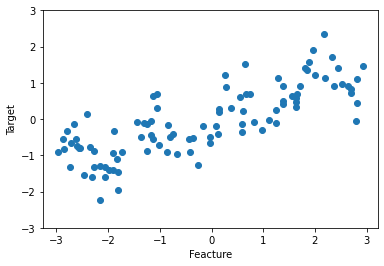

In [4]:
# wave 데이터셋
# 인위적으로 만든 회귀 알고리즘 설명 데이터셋
x, y = mglearn.datasets.make_wave()

# 그래프
plt.plot(x, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feacture")
plt.ylabel("Target")
plt.show()

In [5]:
# breast_cancer 데이터셋
# scikit-learn 패키지에 포함된 데이터셋

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print('cancer 데이터의 형태:', cancer.data.shape)

cancer 데이터의 형태: (569, 30)


In [7]:
print('클래스별 샘플 개수:\n', {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})


클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [8]:
print("특성이름:\n", cancer.feature_names)


특성이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# boston 데이터셋(보스턴 주택가격)
# scikit-learn 패키지에 포함된 데이터셋
from sklearn.datasets import load_boston

boston=load_boston()
print('데이터의 형태:', boston.data.shape)

데이터의 형태: (506, 13)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [10]:
# 보스턴 주택가격 확장(13개의 특성을 각각 곱한 91개의 특성 추가)
x, y = mglearn.datasets.load_extended_boston()
print("x.shape:", x.shape)

x.shape: (506, 104)


==================================================
### 3.2 k-최근접 이웃(kNN)
 - 최근접 이웃(훈련 데이터 셋에서 가장 가까운 데이터 포인트)을 찾는 모델
 - 둘 이상의 이웃을 지정하면 이웃이 더 많은 클래스로 레이블 지정
#### k-최근접 이웃 분류

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


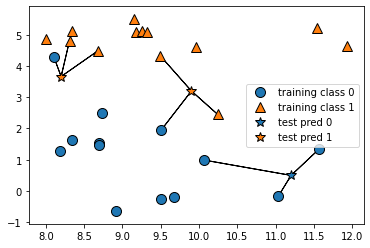

In [11]:
# 3-최근접 이웃 모델 예측
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
# scikit-learn을 이용한 k-최근접 이웃 알고리즘
from sklearn.model_selection import train_test_split

# 데이터 불러오기
x, y = mglearn.datasets.make_forge()

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [13]:
# kNN모델 객체 생성
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

# 훈련
clf.fit(x_train, y_train)

# 예측
print("테스트 세트 예측:", clf.predict(x_test))
print("테스트 세트 정답:", y_test)
print("테스트 세트 점수:", clf.score(x_test, y_test))


테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정답: [1 0 1 0 1 1 0]
테스트 세트 점수: 0.8571428571428571


#### KNeighborsClassifier 분석

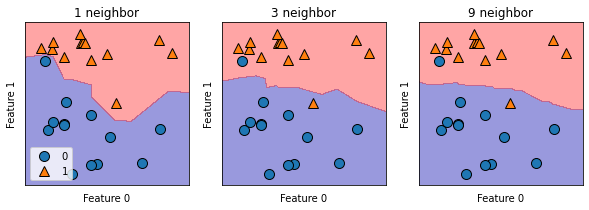

In [14]:
# 결정 경계 확인
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    # fit 메서드는 self오브젝트를 리턴 => 객체생성과 한줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend(loc=3)
plt.show()

# 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이사용하면 낮아짐
# 극단적으로 데이터 전체를 이웃으로 지정하면 모든 테스트 포인트가 같은 예측을 하게됨

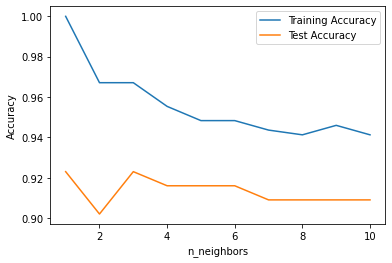

In [15]:
# 모델의 복잡도와 일반화 사이의 관계 입증

# 데이터 불러오기
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

# 1~10 n_neighbors 적용
training_accuracy=[]
test_accuracy=[]

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    
    # 모델 생성 및 훈련
    clf =KNeighborsClassifier(n_neighbors=n_neighbors).fit(x_train, y_train)
    
    # 훈련세트 정확도 저장
    training_accuracy.append(clf.score(x_train, y_train))
    
    # 테스트세트 정확도 저장
    test_accuracy.append(clf.score(x_test, y_test))
    
# 그래프 그리기
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

#### k-최근접 이웃 회귀

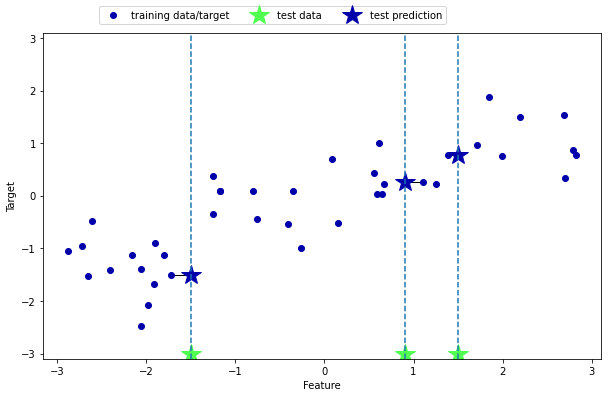

In [16]:
# 1-최근접 이웃 모델 예측
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [17]:
# scikit-learn을 이용한 k-최근접 이웃 알고리즘

from sklearn.neighbors import KNeighborsRegressor

# 데이터 불러오기
x, y = mglearn.datasets.make_wave(n_samples=40)

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# 모델 객체 생성 및 훈련
reg=KNeighborsRegressor(n_neighbors=3).fit(x_train, y_train)

# 예측
print("테스트 세트 예측:\n", reg.predict(x_test))
print("테스트 세트 정답:\n", y_test)
print("테스트 세트 R^2:\n", reg.score(x_test, y_test))


테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 정답:
 [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
테스트 세트 R^2:
 0.8344172446249605


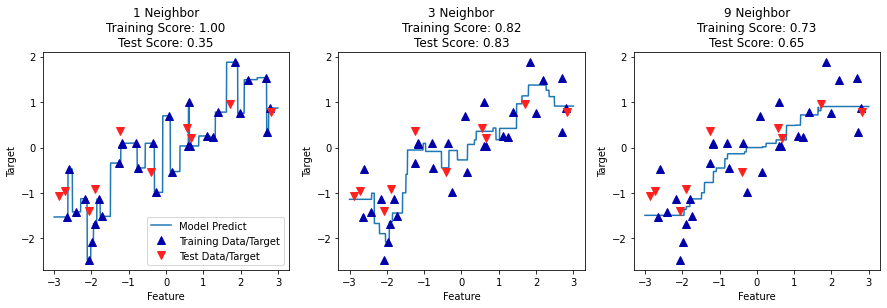

In [18]:
# 그래프로 확인하기
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3 ~ 3 사이에 1000개의 포인트 생성
line= np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    
    # 모델 객체 생성 및 훈련
    reg=KNeighborsRegressor(n_neighbors=n_neighbors).fit(x_train, y_train)
    
    # 그래프 그리기
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} Neighbor\nTraining Score: {:.2f}\nTest Score: {:.2f}"
                 .format(n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model Predict", "Training Data/Target", "Test Data/Target"], loc="best")
plt.show()

# 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 얻음

#### KNeighborsRegressor 분석
#### 장단점과 매개변수
##### KNeighbors 분류기에서 중요한 매개변수
 - 데이터 포인트 사이의 거리를 재는 방법
   - 기본적으로 여러환경에서 잘 동작하는 유클리디안 거리방식을 사용
 - 이웃의 수

##### 장점
 - 이해하기 쉬움
 - 많이 조정하지 않아도 자주 좋은 성능을 발휘
 - 복잡한 알고리즘 적용 전에 시도해보기 좋음

##### 단점
 - 훈련 세트가 매우크면 예측이 느려짐
 - 데이터를 전처리하는 과정이 중요
 - 많은 특성을 가진 데이터셋에는 잘 동작하지 않음
 - 특성 값 대부분이 0인 데이터셋에서는 특히 잘 작동하지 않음

##### => 따라서 현업에서는 잘 쓰지않음, 이러한 단점이 없는 모델 : 선형모델
==================================================
### 3.3 선형 모델(Liner Model)
 - 폭넓게 연구되고 현재도 널리 쓰이는 모델
 - 입력 특성에 대한 선형 함수를 만들어 예측 수행

#### 회귀의 선형 모델
 - 특성이 하나일 땐 직선, 두 개일땐 평면, 더 높은 차원(더 많은 특성)에서는 초평면이 됨
 - 타겟이 특성들의 선형 조합이라는 것은 매우 과한(때론 비현실적인) 가정으로 보임
 - 특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 냄

w[0]: 0.393906  b: -0.031804


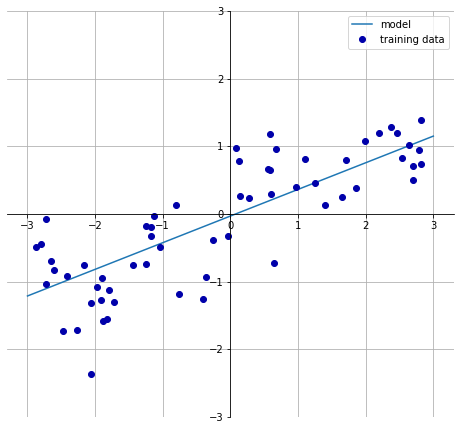

In [19]:
# wave 데이터셋을 이용한 회귀의 선형 모델
mglearn.plots.plot_linear_regression_wave()

#### 선형 회귀(최소제곱법)
 - 선형 회귀(Linear Regression) 또는 최소제곱법(OLS, ordinary least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘
 - 선형 회귀는 예측과 훈련 세트에 있는 타겟 y 사이의 평균제곱오차(Mean Squred Error)를 최소화하는 파라미터 w와 b를 찾음
 - 평균제곱오차: 예측값과 타겟 값의 차이를 제곱하여 더한 후 샘플의 개수로 나눈 것
 - 선형회귀는 매개변수가 없는 것이 장점이지만 모덱의 복잡도를 제어할 방법도 없음

In [20]:
# 선형 모델 만들기
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
x, y = mglearn.datasets.make_wave(n_samples=60)

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# 모델 객체 생성 및 훈련
lr=LinearRegression().fit(x_train, y_train)

##### 기울기 파라미터(w)
 - 기울기는 가중치(Weight) 또는 계수(Coefficient)라고도 함
 - lr객체의 coer_ 속성에 저장되어 있음
 - 각 입력 특성에 하나씩 대응되는 Numpy 배열
 
##### 절편 파라미터(b)
 - 절편(intercept)또는 편향(offset) 이라고도 함
 - lr객체의 intercept_ 속성에 저장되어 있음
 - 실수(Float)값 하나

##### '\_'을 붙이는 이유: scikit-learn은 훈련 데이터에서 유도된 속성에 항상 '\_'를 붙임. 사용자지정 매개변수과 구분

In [21]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [22]:
# 예측
print("훈  련 세트 점수:", lr.score(x_train, y_train))
print("테스트 세트 점수:", lr.score(x_test, y_test))

훈  련 세트 점수: 0.6700890315075756
테스트 세트 점수: 0.65933685968637


In [23]:
# 보스턴 집값 데이터셋의 선형 회귀

x, y = mglearn.datasets.load_extended_boston()

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# 모델 객체 생성 및 훈련
lr=LinearRegression().fit(x_train, y_train)

# 예측
print("훈  련 세트 점수:", lr.score(x_train, y_train))
print("테스트 세트 점수:", lr.score(x_test, y_test))

# => 과대 적합

훈  련 세트 점수: 0.9520519609032728
테스트 세트 점수: 0.6074721959665891


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

#### 릿지(Ridge) 회귀
 - 복잡도를 제어할 수 있는 모델
 - 선형 모델 이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용함
 - 릿지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음
 - 추가 제약 조건: 가중치의 절댓값을 가능한 한 작게 만드는 것(w의 모든 원소가 0에 가깝게)
 - 모든 특성이 출력에 주는 영향을 최소화 함(기울기를 작게 함)
 - 이러한 제약을 "규제(Regularization)"라고 함
 - 규제: 과대적합이 되지 않도록 모델을 강제로 제한
 - 릿지 회귀에서 사용하는 규제방식: L2규제

In [24]:
# 보스턴 집값 데이터셋의 릿지 회귀
from sklearn.linear_model import Ridge

# 모델 객체 생성 및 훈련
ridge=Ridge().fit(x_train, y_train)

# 예측
print("훈  련 세트 점수:", ridge.score(x_train, y_train))
print("테스트 세트 점수:", ridge.score(x_test, y_test))

# => 훈련 세트의 점수는 더 낮지만 테스트 세트에 대한 점수는 더 높음
# => 릿지회귀는 덜 자유롭기 때문에 과대적합이 적어짐(더 일반화된 모델)

훈  련 세트 점수: 0.885796658517094
테스트 세트 점수: 0.7527683481744747


In [25]:
# 릿지회귀의 alpha매개변수(기본값:1): 높을 수록 계수를 0에 가깝게(일반화에 도움)
# alpha=0.00001이면 LinearRegression에서 얻은 점수와 완전히 동일

# alpha=10
ridge10=Ridge(alpha=10).fit(x_train, y_train)
print("alpha=10 훈  련 세트 점수:", ridge10.score(x_train, y_train))
print("alpha=10 테스트 세트 점수:", ridge10.score(x_test, y_test))

print()

# alpha=0.1
ridge01=Ridge(alpha=0.1).fit(x_train, y_train)
print("alpha=0.1 훈  련 세트 점수:", ridge01.score(x_train, y_train))
print("alpha=0.1 테스트 세트 점수:", ridge01.score(x_test, y_test))

alpha=10 훈  련 세트 점수: 0.7882787115369614
alpha=10 테스트 세트 점수: 0.6359411489177309

alpha=0.1 훈  련 세트 점수: 0.9282273685001988
alpha=0.1 테스트 세트 점수: 0.7722067936479644


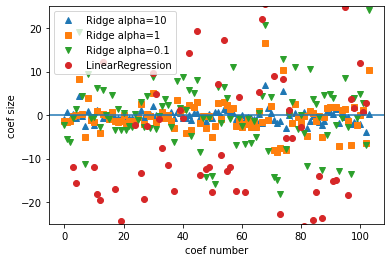

In [26]:
# 선형 회귀와 몇 가지 aplha 값을 가진 릿지 회귀의 계수(coef_) 크기 비교

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('coef number')
plt.ylabel('coef size')
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

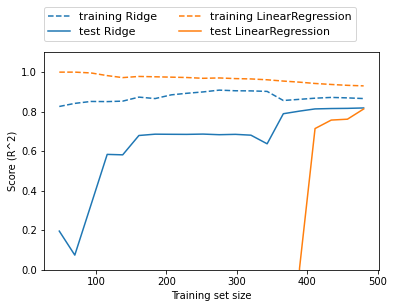

In [27]:
# alpha값을 고정하고 훈련 데이터의 크기 변화

# 데이터셋에서 여러 가지 크기로 샘플링 하여 LinearRegression Ridge(alpha=1)을 적용
# 학습곡선: 데이터셋의 크기에 따른 모델의 성능변화를 나타낸 그래프
mglearn.plots.plot_ridge_n_samples()

# 데이터가 뭋분히 많은경우 규제는 덜 중요해져서 릿지 회귀와 선형회귀의 성능은 비슷해짐
# 선형회귀의 경우 데이터가 많을 수록 훈련 데이터 성능감소 -> 과대적합이 어렵기 때문

#### 라쏘(Lasso) 회귀
 - Ridge의 대안
 - 릿지회귀와 마찬가지로 계수를 0에 가깝게 만드려고 함
 - 하지만 방식이 다름: L1 규제
 - L1규제 사용 시 어떤 계수는 진짜 0이 됨(특성을 모델에서 완전히 제외)
 - 즉, 특성 선택(Feature Selection)이 자동으로 이뤄짐
 - 모델을 이해하기 쉬워지고 모델의 가장 중요한 특성이 무엇인지 드러내줌

In [28]:
# 보스턴 집값 데이터셋의 라쏘 회귀
from sklearn.linear_model import Lasso

# 모델 객체 생성 및 훈련
lasso=Lasso().fit(x_train, y_train)

# 예측
print("훈  련 세트 점수:", lasso.score(x_train, y_train))
print("테스트 세트 점수:", lasso.score(x_test, y_test))
print("사용한 특성 개수:", np.sum(lasso.coef_ != 0))

# => 훈련 세트와 테스트 세트에 대한 점수 모두 낮음 => 과소적합
# 104개의 특성 중 4개만 사용

훈  련 세트 점수: 0.29323768991114607
테스트 세트 점수: 0.20937503255272294
사용한 특성 개수: 4


In [29]:
# 릿지회귀의 alpha매개변수(기본값:1): 높을 수록 강하게 계수를 0으로 만들어줌

# alpha=0.01
lasso001=Lasso(alpha=0.001, max_iter=50000).fit(x_train, y_train)
print("훈  련 세트 점수:", lasso001.score(x_train, y_train))
print("테스트 세트 점수:", lasso001.score(x_test, y_test))
print("사용한 특성 개수:", np.sum(lasso001.coef_ != 0))

print()

# alpha=0.0001
lasso00001=Lasso(alpha=0.00001, max_iter=50000).fit(x_train, y_train)
print("훈  련 세트 점수:", lasso00001.score(x_train, y_train))
print("테스트 세트 점수:", lasso00001.score(x_test, y_test))
print("사용한 특성 개수:", np.sum(lasso00001.coef_ != 0))

# alpha=0.1 Ridge 모델은 alpha=0.01 Lasso 모델과 성능이 비슷하지만 Ridge 모델계수는 0이 되지 않음
# alpha값이 너무 낮으면 규제의 효과가 없어져 과대적합이 됨(LinearRegression의 결과와 비슷해짐)

훈  련 세트 점수: 0.939282766590254
테스트 세트 점수: 0.7386563657403378
사용한 특성 개수: 67

훈  련 세트 점수: 0.9514848638238977
테스트 세트 점수: 0.6206848295869678
사용한 특성 개수: 103


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


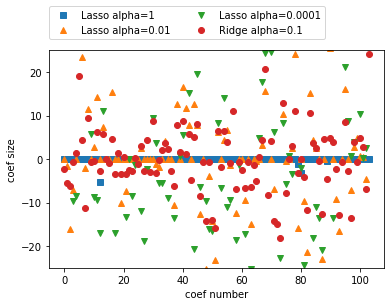

In [30]:
# 릿지 회귀와 alpha값이 다른 라쏘 회귀의 계수 크기 비교

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('coef number')
plt.ylabel('coef size')
plt.show()

#### 이진 분류용 선형 모델
  - 선형 회귀와 아주 비슷
  - 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교
  - 계산한 값이 0보다 작으면 클래스를 -1, 크면 +1로 예측 -> 분류에 쓰이는 모든 선형모델에서 동일
  - 가장 많이 알려진 두개의 선형 분류 알고리즘
    - 로지스틱 회귀(Logistic Regression)
    - SVC(Support Vector Machine, 서포트 벡터 머신)
    - -> 기본적으로 L2규제 사용
    - -> 규제강도 파라미터 C(기본1): 높을수록 규제감소(과대적합)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


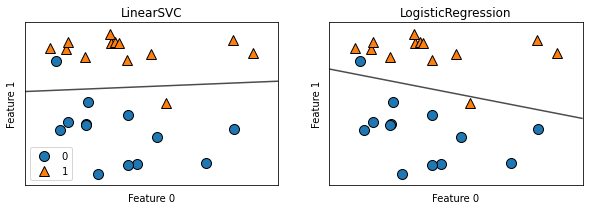

In [31]:
# forge 데이터셋
# LogisticRegression과 LInearsSVC 모델의 결정경계

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

x, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    
    clf=model.fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

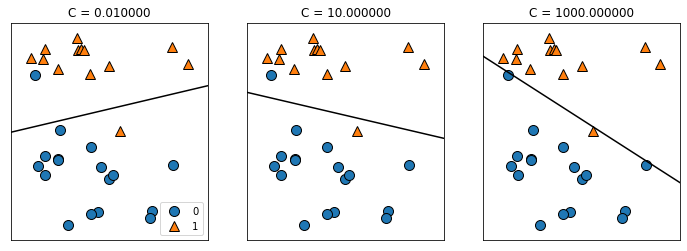

In [32]:
# C파라미터 조절(0.01, 10, 1000)
mglearn.plots.plot_linear_svc_regularization()

In [33]:
# 유방암 데이터셋을 이용한 LogisticRegression

# 데이터 불러오기

from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# 모델 객체 생성 및 훈련
logreg=LogisticRegression(max_iter=5000).fit(x_train, y_train)

# 예측
print("훈  련 세트 점수:", logreg.score(x_train, y_train))
print("테스트 세트 점수:", logreg.score(x_test, y_test))

# => 점수 비슷 : 과소적합일 가능성


훈  련 세트 점수: 0.9577464788732394
테스트 세트 점수: 0.958041958041958


In [34]:
# C를 증가시켜 규제(제약) 풀어주기

# 모델 객체 생성 및 훈련
logreg100=LogisticRegression(C=100, max_iter=5000).fit(x_train, y_train)

# 예측
print("훈  련 세트 점수:", logreg100.score(x_train, y_train))
print("테스트 세트 점수:", logreg100.score(x_test, y_test))

# => 점수 모두 증가(과소적합 해소)


훈  련 세트 점수: 0.9835680751173709
테스트 세트 점수: 0.965034965034965


In [35]:
# C를 감소시켜 규제(제약) 강하게

# 모델 객체 생성 및 훈련
logreg001=LogisticRegression(C=0.01, max_iter=5000).fit(x_train, y_train)

# 예측
print("훈  련 세트 점수:", logreg001.score(x_train, y_train))
print("테스트 세트 점수:", logreg001.score(x_test, y_test))

# => 원래 과소적합이어서 점수 더 낮아짐


훈  련 세트 점수: 0.9530516431924883
테스트 세트 점수: 0.951048951048951


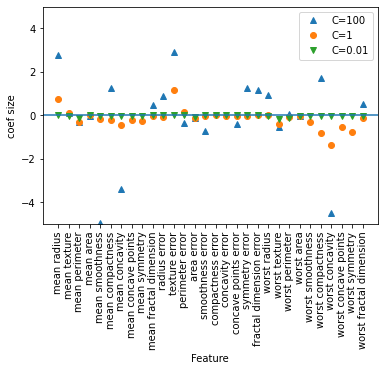

In [36]:
# C값이 서로다른 로지스틱 회귀의 계수

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('Feature')
plt.ylabel('coef size')
plt.legend()
plt.show()

C=0.001인 L1 로지스틱 회귀의 훈  련 정확도: 0.9131455399061033
C=0.001인 L1 로지스틱 회귀의 테스트  정확도: 0.9230769230769231
C=1인 L1 로지스틱 회귀의 훈  련 정확도: 0.960093896713615
C=1인 L1 로지스틱 회귀의 테스트  정확도: 0.958041958041958
C=100인 L1 로지스틱 회귀의 훈  련 정확도: 0.9859154929577465
C=100인 L1 로지스틱 회귀의 테스트  정확도: 0.9790209790209791


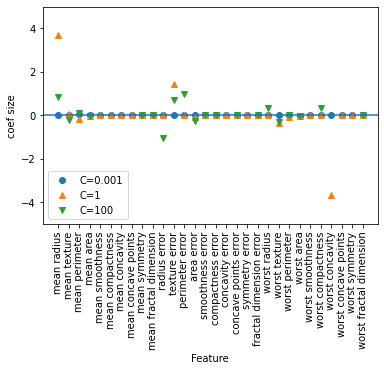

In [37]:
# L1 규제를 사용한 LogisticRegression

for C, maker in zip([0.001, 1, 100], ['o', '^', 'v']):
    
    # solver의 기본값 'lbfgs'를 'liblinear'로 바꿔야 l1규제 사용 가능
    # LinearSVC는 loss파라미터에 손실 함수 지정
    lr_l1=LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(x_train, y_train)
    
    print("C={}인 L1 로지스틱 회귀의 훈  련 정확도: {}".format(C, lr_l1.score(x_train, y_train)))
    print("C={}인 L1 로지스틱 회귀의 테스트  정확도: {}".format(C, lr_l1.score(x_test, y_test)))
    
    plt.plot(lr_l1.coef_.T, maker, label="C={}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('Feature')
plt.ylabel('coef size')
plt.legend(loc=3)
plt.show()

#### 다중 클래스 분류용 선형 모델
 - 로지스틱 회귀를 제외한 대부분의 선형 분류 모델은 이진 분류만을 지원
 - 일대다 방법(One-vs.-rest)
 - -> 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적 기법
 - -> 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴
 - -> 클래스의 수만큼 이진 분류 모델이 만들어짐: 각 클래스가 w(계수)와 b(절편)을 가짐
 - -> 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택

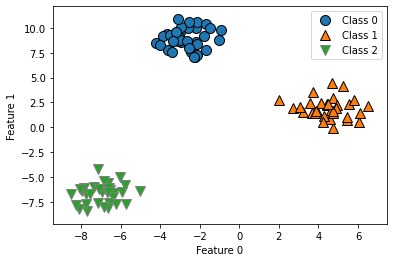

In [38]:
# 3개의 클래스를 가진 2차원 데이터셋

from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)

mglearn.discrete_scatter(x[:,0], x[:,1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [39]:
# LinearSVC 분류기

# 모델 객체 생성 및 훈련
linear_svm=LinearSVC().fit(x, y)

# 예측
print("계수 배열의 크기:", linear_svm.coef_.shape)
print("절편 배열의 크기:", linear_svm.intercept_.shape)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


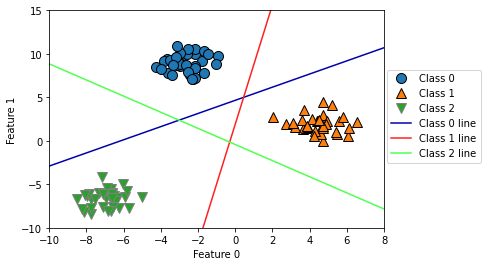

In [40]:
# 세 개의 이진분류기가 만든 결정 경계

mglearn.discrete_scatter(x[:,0], x[:,1], y)
line=np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 line", "Class 1 line", "Class 2 line"], loc=(1.01, 0.3))

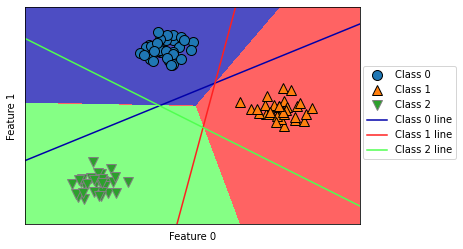

In [41]:
# 세 개의 이진분류기가 만든 다중 클래스 결정 경계

mglearn.plots.plot_2d_classification(linear_svm, x, fill=True, alpha=0.7)
mglearn.discrete_scatter(x[:,0], x[:,1], y)
line=np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 line", "Class 1 line", "Class 2 line"], loc=(1.01, 0.3))

#### 장단점과 매개변수
 - 주요 매개변수
   - 선형 회귀모델: alpha (클수록 모델 단순(과소적합))
   - 선형 분류모델: C (작을수록 모델 단순(과소적합))
 - 규제
   - 기본적으로 L2규제
   - L1규제: 중요한 특성이 많지 않다고 생각될 때
 - 선형 모델의 장단점
  - 학습 속도 빠르고 예측도 빠름
  - 매우 큰 데이터셋과 희소한 데이터 셋에서도 잘 작동
  - 선형 모델 대용량 처리 버전: SGDClassifier, SGDRegressor
  - 예측 이해가 쉬움(계수와 절편)
  - 계수의 값이 어떻게 정해졌는지 명확하지 않음(데이터셋의 특성들이 서로 깊게 연관되어 있을 때)
  - 샘플에 비해 특성이 많을 때 잘 작동
  - 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음

#### 확률적 경사 하강법(Stochastic Gradient Descent)
 - 대용량 데이터에 사용 가능, 속도 빠름
 - 튜닝할 하이퍼파라미터가 많고 특성 스케일에 민감
 - penalty 매개변수에 'l1', 'l2'(기본값), 'elasticnet' 지정 가능
 - alpha 매개변수: 규제 강도 조정, 기본값: 0.0001
 - loss 매개변수에 손실함수 지정
   - SGDClassifier
     - loss='hinge': 기본값(힌지 손실), SVM모델 훈련
     - loss='log': 로지스틱 회귀 모델 훈련
   - SGDRegressor
     - loss='squared_error': 기본값, 릿지모델 훈련
 - 반복 횟수 매개 변수
   - max_iter 매개변수: 알고리즘 반복 횟수, 기본값:1000
   - early_stopping가 True일 때, n_iter_no_change번 반복동안 tol만큼의 변화가없으면 훈련 종료
     - early_stopping 매개변수: 조기 종료 설정, 기본값:False
     - n_iter_no_change 매개변수: 기본값:5
     - tol 매개변수: 기본값:0.001
 - learning_rate 매개변수: 확률적 경사하강법의 학습률
   - 기본값:'optimal': 반복횟수에 따라 비례적으로 감소
   - 'constant': 'eta0'에 지정한 값을 사용, eta0기본값:0
   - 'invscaling': 'eta0'에서 지수적으로 감소
   - 'adaptive': 'eta0'에서 시작하여 조기 종료 조건이 될 때마다 5배씩 줄이며 le-6보다 작아지면 알고리즘 종료
 - n_jobs 매개변수: SGDClassifier에서 OVA(one versus all) 다중분류를 병렬화 하기 위해 사용할 CPU 코어 개수를 지정

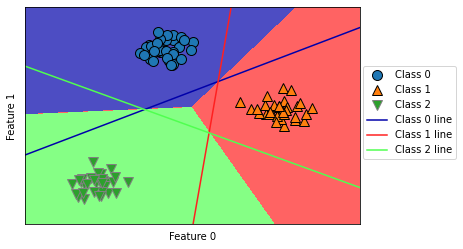

In [42]:
# SGDClassifier의 n_jobs 매개변수
from sklearn.linear_model import SGDClassifier

# 모델 객체 생성 및 훈련
sgd_c=SGDClassifier(alpha=0.01, learning_rate='adaptive', eta0=0.1, random_state=42, n_jobs=-1)
sgd_c.fit(x, y)

mglearn.plots.plot_2d_classification(sgd_c, x, fill=True, alpha=0.7)
mglearn.discrete_scatter(x[:,0], x[:,1], y)
line=np.linspace(-15, 15)

for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
    
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 line", "Class 1 line", "Class 2 line"], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [43]:
# 확장된 보스턴 데이터셋을 이용한 SGDRegressor
from sklearn.linear_model import SGDRegressor

# 데이터 불러오기
x, y = mglearn.datasets.load_extended_boston()

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# 모델 객체 생성 및 훈련
sgd_r=SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(x_train, y_train)

# 예측
print("훈  련 세트 점수:", sgd_r.score(x_train, y_train)) 
print("테스트 세트 점수:", sgd_r.score(x_test, y_test))


훈  련 세트 점수: 0.9070757607443197
테스트 세트 점수: 0.769828026234392


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

==================================================
### 3.4 나이브 베이즈(Naive Bayes) 분류기
 - 선형 모델과 유사
 - 선형 모델에 비해 훈련 속도가 빠른 편이지만, 일반화 성능이 조금 떨어짐 
 - 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취함
 - GaussianNB: 연속적인 어떤 데이터에도 적용 가능, 클래스별 각 특성의 분산과 평균을 저장
 - BernoulliNB: 이진데이터, 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 카운트, 주로 텍스트데이터 분류에 사용
 - MultinomialNB: 카운트 데이터(특성의 어떤 것을 헤아린 정수 카운트), 클래스별 특성의 평균을 계산, 주로 텍스트데이터 분류에 사용 

#### 장단점과 매개변수
 - 나이브 베이즈 모델과 선형 모델의 장단점은 비슷
   - 훈련과 예측 빠르고 훈련과정 이해 쉬움
   - 희소한 고차원 데이터에서 잘 작동
   - 비교적 매개변수에 민감하지 않음
   - 선형 모델로는 학습 시간이 너무 오래 걸릴 때 시도하기 좋음 
 - alpha 매개변수 
   - MultinomialNB, BernoulliNB의 복잡도 조절
   - 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 만큼 추가
   - alpha클수록 완만, 복잡도 떨어지고 단순해짐
   - 정확도를 높일수 있지만 성능에 크게 기여하지 않음
 - GaussianNB은 대부분 매우 고차원인 데이터셋에 사용
 - BernoulliNB, MultinomialNB 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용
 - MultinomialNB는 일반적으로 0이아닌 특성이 많은 데이터셋에서 BernoulliNB보다 성능 높음